In [1]:
#Import the required packages and librares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
# Our dataset is in a CSV file named 'amazon_reviews.csv'
data = pd.read_csv('amazon_reviews.csv')

In [3]:
# Display the first few rows of the dataset
data.head(8)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
6,6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.0
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.0


In [4]:
#Analyze the shape(rows and columns) of dataset
data.shape

(4915, 12)

In [5]:
# Getting datatype information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [6]:
# Having an overview of the dataset by displaying the top 5 rows and the last 5 rows
data

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [7]:
# Data Preprocessing to isolate the needed column in the dataset
data = data[['reviewText', 'overall']].dropna()
data

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0
4911,Used this for extending the capabilities of my...,5.0
4912,Great card that is very fast and reliable. It ...,5.0
4913,Good amount of space for the stuff I want to d...,5.0


In [8]:
# Data Exploration

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4914 entries, 0 to 4914
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  4914 non-null   object 
 1   overall     4914 non-null   float64
dtypes: float64(1), object(1)
memory usage: 115.2+ KB


In [9]:
# Checking for missing values in the dataset

data.isnull().sum()

reviewText    0
overall       0
dtype: int64

In [10]:
#Reviewing the dataset statistically
data.describe()

,overall
count,4914.000000
mean,4.587505
std,0.996929
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [11]:
# Having an overview the dataset after the preprocessing method
data

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0
4911,Used this for extending the capabilities of my...,5.0
4912,Great card that is very fast and reliable. It ...,5.0
4913,Good amount of space for the stuff I want to d...,5.0


In [12]:
# Getting datatype information about the dataset
data.dtypes

reviewText     object
overall       float64
dtype: object

In [13]:
#Analyze the shape(rows and columns) of dataset
data.shape

(4914, 2)

In [14]:
# Classifying the reviews as positive,  negative  and neutral in the dataset
data['sentiment'] = data['overall'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))

print("Positive reviews:", sum(data["overall"]>=4.0))
print("Negative reviews:",  sum(data["overall"]<=2.0))
print("Neutral reviews:",  sum(data["overall"]==3.0))

Positive reviews: 4448
Negative reviews: 324
Neutral reviews: 142


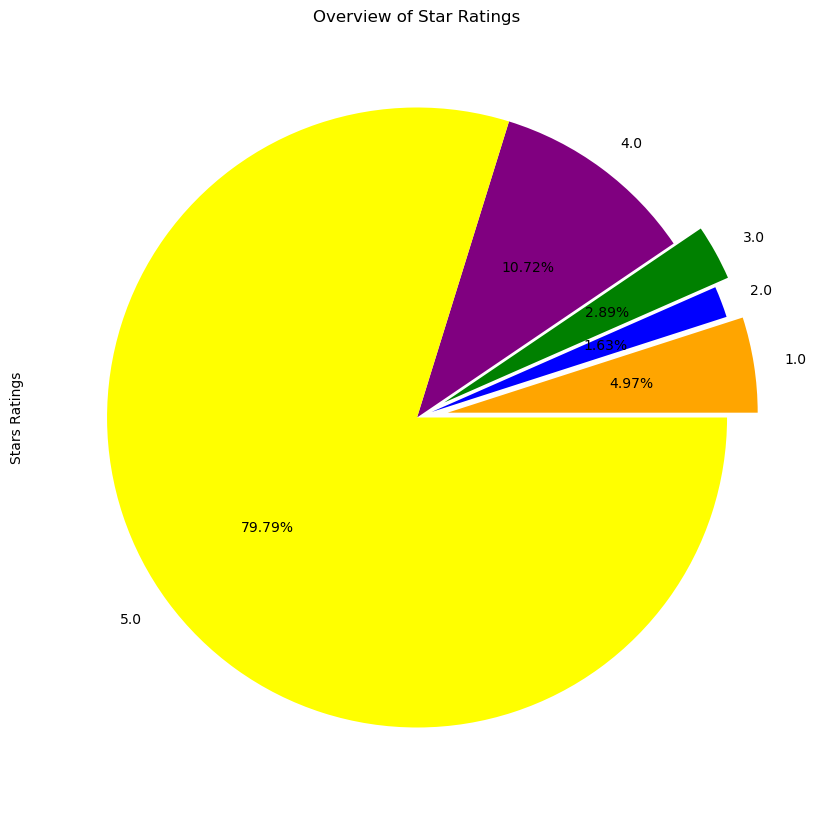

In [15]:
#Exploring the Data Analysis and Visualization
#Classifying with the number of star rating each review got

explode = [0.1, 0.05, 0.1, 0, 0]
colors = ( "orange", "blue", "green",
          "purple", "yellow",)

ax=data["overall"].value_counts().sort_index()\
       .plot(kind='pie',label='Stars Ratings', explode=explode, autopct='%1.2f%%', colors=colors,
            title='Overview of Star Ratings',
            figsize=(10,15)) 
plt.show()

In [16]:
# Loading additional libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [17]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(data['reviewText'], data['overall'], test_size=0.2, random_state=42)

In [18]:
# Using  TF-IDF for Text Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [19]:
# Training Model - Logistic Regression with TF-IDF
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [20]:
# Evaluating Model - Logistic Regression with TF-IDF
y_pred_logreg = logreg_model.predict(X_test_tfidf)
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid for fine-tuning
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Algorithm to use in the optimization problem
    # You can add other hyperparameters here
}

# Initialize GridSearchCV
grid_search_logreg = GridSearchCV(estimator=LogisticRegression(max_iter=1000), 
                                  param_grid=param_grid_logreg, 
                                  cv=3, 
                                  n_jobs=-1, 
                                  verbose=2)

# Fit GridSearchCV with the training data
grid_search_logreg.fit(X_train_tfidf, y_train)

# Best Model
best_logreg_model = grid_search_logreg.best_estimator_

# Make predictions with the best model
y_pred_best_logreg = best_logreg_model.predict(X_test_tfidf)

# Evaluate the best model
mse_best_logreg = mean_squared_error(y_test, y_pred_best_logreg)
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
classification_report_best_logreg = classification_report(y_test, y_pred_best_logreg, zero_division=1)

# Display evaluation metrics
print(f'Best Logistic Regression Model Mean Squared Error: {mse_best_logreg}')
print(f'Best Logistic Regression Model Accuracy: {accuracy_best_logreg}')
print('Best Logistic Regression Classification Report:\n', classification_report_best_logreg)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Logistic Regression Model Mean Squared Error: 0.8921668362156663
Best Logistic Regression Model Accuracy: 0.8118006103763988
Best Logistic Regression Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.20      0.29        44
         2.0       1.00      0.00      0.00        12
         3.0       1.00      0.00      0.00        30
         4.0       0.25      0.01      0.02       107
         5.0       0.82      1.00      0.90       790

    accuracy                           0.81       983
   macro avg       0.71      0.24      0.24       983
weighted avg       0.75      0.81      0.74       983



[[  9   0   0   1  34]
 [  4   0   0   0   8]
 [  3   0   0   1  26]
 [  1   0   0   1 105]
 [  1   0   0   1 788]]
Logistic Regression Model Mean Squared Error: 0.8921668362156663
Logistic Regression Model Accuracy: 0.8118006103763988
Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.20      0.29        44
         2.0       1.00      0.00      0.00        12
         3.0       1.00      0.00      0.00        30
         4.0       0.25      0.01      0.02       107
         5.0       0.82      1.00      0.90       790

    accuracy                           0.81       983
   macro avg       0.71      0.24      0.24       983
weighted avg       0.75      0.81      0.74       983

Confusion Matrix:
[[  9   0   0   1  34]
 [  4   0   0   0   8]
 [  3   0   0   1  26]
 [  1   0   0   1 105]
 [  1   0   0   1 788]]


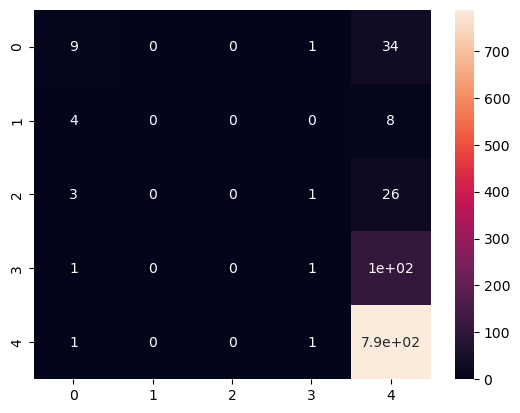

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix


# Predict and evaluate the model
y_pred_logreg = logreg_model.predict(X_test_tfidf)
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg, zero_division=1)


cm = confusion_matrix(y_test, y_pred_logreg) 
sns.heatmap(cm, annot = True) 
print(cm)

print(f'Logistic Regression Model Mean Squared Error: {mse_logreg}')
print(f'Logistic Regression Model Accuracy: {accuracy_logreg}')
print('Classification Report:\n', classification_report_logreg)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


In [23]:
import joblib

# Save the TF-IDF Vectorizer and Logistic Regression Model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(logreg_model, 'logreg_model.joblib')

['logreg_model.joblib']

In [24]:
# Load the TF-IDF Vectorizer and Logistic Regression Model
tfidf_vectorizer = joblib.load('tfidf_vectorizer.joblib')
logreg_model = joblib.load('logreg_model.joblib')

In [25]:
# New data example
new_reviews = ["This product was great!", 
               "I did not like this product.", 
               "It was okay, not the best."]

# Vectorize the new data
new_reviews_tfidf = tfidf_vectorizer.transform(new_reviews)

# Predict using the logistic regression model
new_predictions = logreg_model.predict(new_reviews_tfidf)

# Output the predictions
print(new_predictions)


[5. 5. 5.]
